In [1]:
import time

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from util import display_image

### shape matching

In [2]:
target = cv.imread('../img/4star.jpg')
shapes = cv.imread('../img/shapestomatch.jpg')

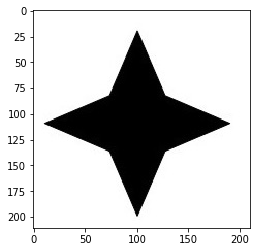

In [5]:
display_image(target)

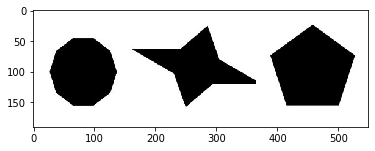

In [8]:
display_image(shapes)

In [4]:
targetGray = cv.cvtColor(target, cv.COLOR_BGR2GRAY)
shapesGray = cv.cvtColor(shapes, cv.COLOR_BGR2GRAY)

In [9]:
# swap black and white
ret, targetTh = cv.threshold(targetGray, 127, 255, cv.THRESH_BINARY_INV)
ret, shapesTh = cv.threshold(shapesGray, 127, 255, cv.THRESH_BINARY_INV)

In [10]:
# find contour
cntrs_target, _ = cv.findContours(targetTh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cntrs_shapes, _ = cv.findContours(shapesTh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [12]:
# list to save matching score
matches = []

for cntr in cntrs_shapes:
    # cv.CONTOURS_MATCH_I2: Hu moment method
    match = cv.matchShapes(cntrs_target[0], cntr, cv.CONTOURS_MATCH_I2, 0.0)
    matches.append((match, cntr))
    # set score at the start point
    cv.putText(shapes, '%.2f'%match, tuple(cntr[0][0]), cv.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)

In [13]:
matches.sort(key=lambda x: x[0])

In [17]:
# draw contour having a lowest score
cv.drawContours(shapes, [matches[0][1]], -1, (0, 255, 0), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

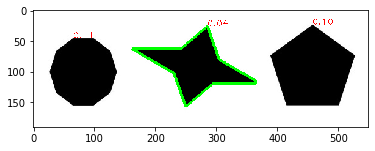

In [20]:
display_image(shapes)

### Hough transform
- identify simple shapes like line or circle...
- cv.HoughLines(img, rho, theta, threshold\[, lines, srn=0, stn=0, min_theta, max_theta\])
    - rho: distance measurement resolution (0-1)
    - theta: angle measurement resolution (rad)
    - threshold: line identifying critrea
        - small: low accuracy, high identified numbers
        - high: high accuracy, less identified numbers

In [24]:
img = cv.imread('../img/sudoku.jpg')
img2 = img.copy()

In [25]:
h, w = img.shape[:2]

In [26]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(imgray, 100, 200)

In [27]:
# hough line detection
lines = cv.HoughLines(edges, 1, np.pi/180, 130)

In [28]:
len(lines)

45

In [29]:
lines[0]

array([[143.,   0.]], dtype=float32)

In [30]:
for line in lines:
    r, theta = line[0]
    # trigonometric ratio respect to x, y axis
    tx, ty = np.cos(theta), np.sin(theta)
    # intercept points in x,y coordinate
    x0, y0 = tx*r, ty*r
    cv.circle(img2, (abs(x0), abs(y0)), 3, (0, 0, 255), -1)
    
    x1, y1 = int(x0 + w*(-ty)), int(y0 + h*tx)
    x2, y2 = int(x0 - w*(-ty)), int(y0 - h*tx)
    
    cv.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

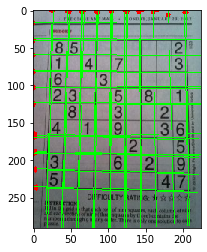

In [31]:
display_image(img2)

### probabilistic hough transform
- cv.HoughLinesP(img, rho, theta, threshold\[, lines, minLineLength, maxLineGap\])

In [32]:
img = cv.imread('../img/sudoku.jpg')
img2 = img.copy()

In [33]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(imgray, 100, 200)

In [34]:
# hough line detection
lines = cv.HoughLinesP(edges, 1, np.pi/180, 10, None, 20, 2)

In [35]:
len(lines)

124

In [36]:
lines[0]

array([[ 32,  39, 205,  39]], dtype=int32)

In [37]:
for line in lines:
    x1, y1, x2, y2 = line[0]    
    cv.line(img2, (x1, y1), (x2, y2), (0, 255, 0), 1)

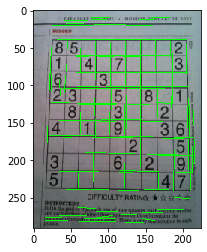

In [38]:
display_image(img2)

### split continuous regions

In [47]:
img = cv.imread('../img/full_body.jpg', cv.IMREAD_GRAYSCALE)
_, biimg = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)

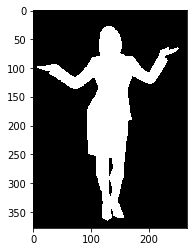

In [48]:
display_image(biimg)

In [49]:
# 5 for kernel size
dst = cv.distanceTransform(biimg, cv.DIST_L2, 5)

In [50]:
dst.shape

(378, 267)

In [51]:
# normalize to 0-255
dst = (dst/(dst.max()-dst.min())*255).astype(np.uint8)

In [52]:
# 7 for block size
skeleton = cv.adaptiveThreshold(dst, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, -3)

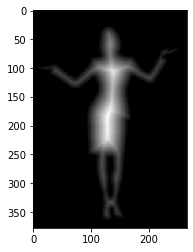

In [54]:
display_image(dst)

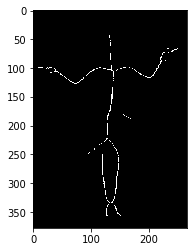

In [53]:
display_image(skeleton)

## Exercise1: document scanner

In [55]:
img = cv.imread('../img/paper.jpg')

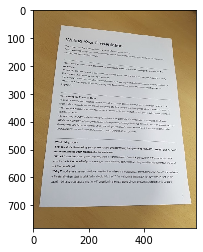

In [56]:
display_image(img)

In [57]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (3, 3), 0)

In [58]:
edged = cv.Canny(gray, 75, 200)

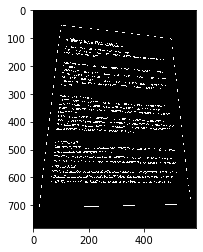

In [59]:
display_image(edged)

In [60]:
cnts, _ = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [65]:
len(cnts)

1

In [62]:
draw = img.copy()

In [63]:
cv.drawContours(draw, cnts, -1, (0, 255, 0))

array([[[ 69, 116, 148],
        [ 68, 115, 147],
        [ 68, 115, 147],
        ...,
        [ 26,  50,  74],
        [ 25,  49,  71],
        [ 23,  47,  69]],

       [[ 68, 115, 147],
        [ 70, 117, 149],
        [ 70, 117, 149],
        ...,
        [ 30,  54,  78],
        [ 26,  50,  72],
        [ 24,  48,  70]],

       [[ 66, 113, 145],
        [ 70, 117, 149],
        [ 71, 118, 150],
        ...,
        [ 30,  56,  80],
        [ 27,  54,  75],
        [ 25,  52,  73]],

       ...,

       [[ 58, 100, 129],
        [ 58, 100, 129],
        [ 58, 100, 129],
        ...,
        [ 96, 166, 195],
        [103, 173, 202],
        [101, 171, 200]],

       [[ 57,  99, 128],
        [ 57,  99, 128],
        [ 58, 100, 129],
        ...,
        [ 97, 167, 196],
        [103, 173, 202],
        [101, 171, 200]],

       [[ 57,  99, 128],
        [ 57,  99, 128],
        [ 57,  99, 128],
        ...,
        [102, 172, 201],
        [ 99, 169, 198],
        [ 97, 167, 196]]

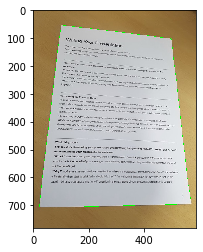

In [64]:
display_image(draw)

In [66]:
# top 5 contours having highest area
cnts = sorted(cnts, key=cv.contourArea, reverse=True)[:5]

for c in cnts:
    # approximate contour (starting from highest area)
    peri = cv.arcLength(c, True)    
    # 0.02: error range
    vertices = cv.approxPolyDP(c, 0.02*peri, True)
    
    # find rectangle
    if len(vertices) == 4:
        break

In [67]:
pts = vertices.reshape(4, 2)

In [68]:
for x, y in pts:
    cv.circle(draw, (x, y), 10, (0, 255, 0), -1)

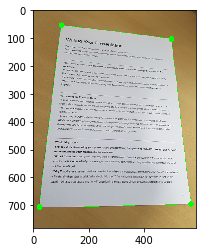

In [69]:
display_image(draw)

In [73]:
# x+y
sm = pts.sum(axis=1)
# x-y
diff = np.diff(pts, axis=1)

# lowest x+y
topLeft = pts[np.argmin(sm)]
# highest x+y
bottomRight = pts[np.argmax(sm)]
# lowest x-y
topRight = pts[np.argmin(diff)]
# highest x-y
bottomLeft = pts[np.argmax(diff)]

In [74]:
pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])

In [75]:
w1 = abs(bottomRight[0] - bottomLeft[0])
w2 = abs(topRight[0] - topLeft[0])
h1 = abs(topRight[1] - bottomRight[1])
h2 = abs(topLeft[1] - bottomLeft[1])

width = max([w1, w2])
height = max([h1, h2])

In [76]:
pts2 = np.float32([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]])

In [78]:
mtrx = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img, mtrx, (width, height))

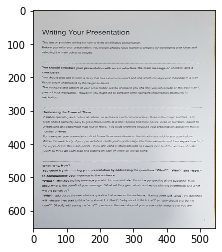

In [80]:
display_image(result)

## Exercise2: count the number of coins

In [87]:
img = cv.imread('../img/coins_connected.jpg')
rows, cols = img.shape[:2]
print(rows, cols)

419 601


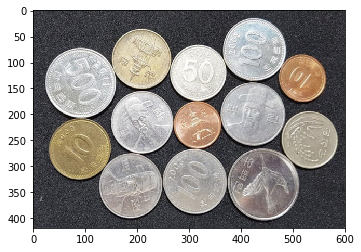

In [88]:
display_image(img)

In [ ]:
# background and background is very intuitive
# but there are many different patterns in each coin which make difficult to detecting edges
# apply mean-shift to remove noises in each of the coins

In [89]:
mean = cv.pyrMeanShiftFiltering(img, 20, 50)

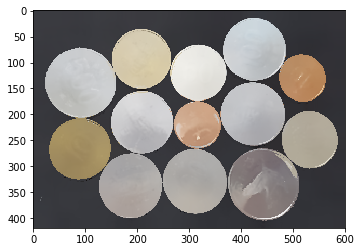

In [90]:
display_image(mean)

In [91]:
gray = cv.cvtColor(mean, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (3, 3), 0)

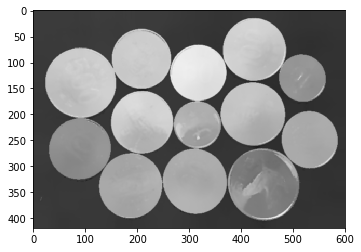

In [92]:
display_image(gray)

In [93]:
# otsu automatically determines thresholds
_, thres = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

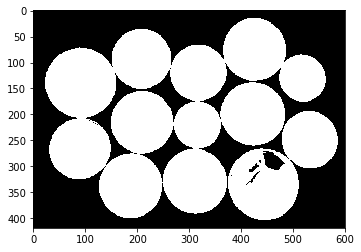

In [94]:
display_image(thres)

In [97]:
# distance transform
dst = cv.distanceTransform(thres, cv.DIST_L2, 3)
dst = (dst/(dst.max()-dst.min())*255).astype(np.uint8)

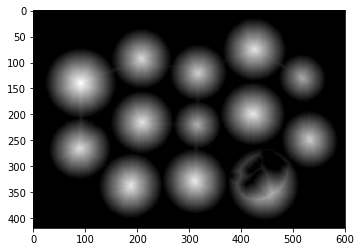

In [98]:
display_image(dst)

In [99]:
# find local max in distance transform result
# used to determine the size of each coin
localMx = cv.dilate(dst, np.ones((50, 50), np.uint8))

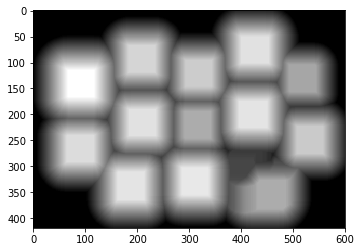

In [104]:
display_image(localMx)

In [101]:
# save local max in this array
lm = np.zeros((rows, cols), np.uint8)
lm[(localMx == dst) & (dst !=0)] = 255

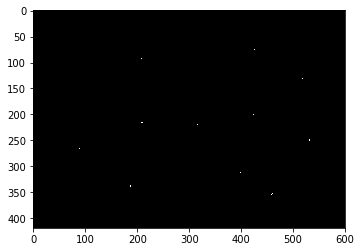

In [103]:
display_image(lm)

In [106]:
# local max indices
seeds = np.where(lms == 255)
seed = np.stack((seeds[1], seeds[0]), axis=-1)

In [107]:
# color fill mask
fill_mask = np.zeros((rows+2, cols+2), np.uint8)

In [108]:
for x, y in seed:
    # set local max as seed and use it to fill mean shift image with colors
    ret = cv.floodFill(mean, fill_mask, (x, y), (255, 255, 255), (10, 10, 10), (10, 10, 10))

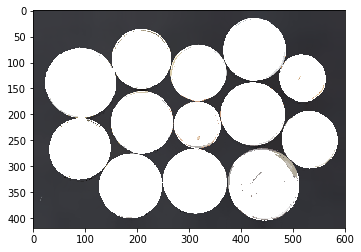

In [110]:
display_image(mean)

In [115]:
# apply distance transform to color-filled image
gray = cv.cvtColor(mean, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (5, 5), 0)

_, thres = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

dst = cv.distanceTransform(thres, cv.DIST_L2, 3)
dst = (dst/(dst.max()-dst.min())*255).astype(np.uint8)

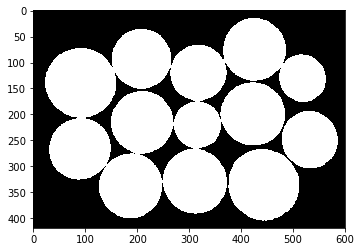

In [119]:
display_image(thres)

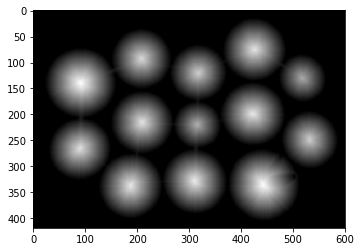

In [120]:
display_image(dst)

In [121]:
# set a region as foreground which takes up at least half of result of distance transform
ret, sure_fg = cv.threshold(dst, 0.5*dst.max(), 255, 0)

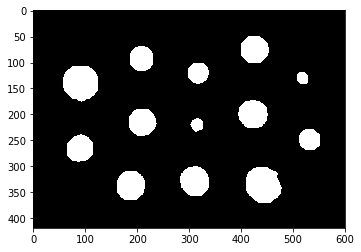

In [122]:
display_image(sure_fg)

In [123]:
# find sure background
_, bg_th = cv.threshold(dst, 0.3*dst.max(), 255, cv.THRESH_BINARY_INV)
bg_dst = cv.distanceTransform(bg_th, cv.DIST_L2, 5)
bg_dst = ((bg_dst/(bg_dst.max()-bg_dst.min()))*255).astype(np.uint8)
ret, sure_bg = cv.threshold(bg_dst, 0.3*bg_dst.max(), 255, cv.THRESH_BINARY)

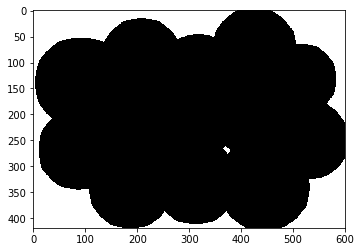

In [124]:
display_image(sure_bg)

In [126]:
# set unsure backgroud
ret, inv_sure_bg = cv.threshold(sure_bg, 127, 255, cv.THRESH_BINARY_INV)
unknown = cv.subtract(inv_sure_bg, sure_fg)

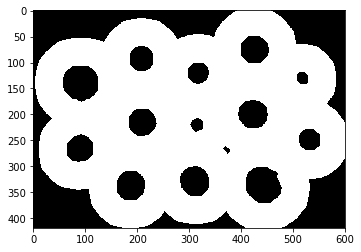

In [127]:
display_image(unknown)

In [129]:
# connected-componts labeling
_, markers = cv.connectedComponents(sure_fg)

In [131]:
markers = markers+1
markers[unknown == 255] = 0

In [132]:
# before watershed
print(np.unique(markers))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [133]:
colors = []
marker_show = np.zeros_like(img)
for mid in np.unique(markers):
    color = [int(j) for j in np.random.randint(0, 255, 3)]
    colors.append((mid, color))
    marker_show[markers == mid] = color
    coords = np.where(markers == mid)
    x, y = coords[1][0], coords[0][0]
    cv.putText(marker_show, str(mid), (x+20, y+20), cv.FONT_HERSHEY_PLAIN, 2, (255, 255, 255))

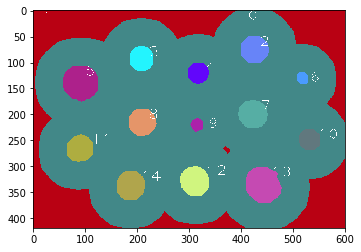

In [134]:
display_image(marker_show)

In [135]:
# apply markershed
markers = cv.watershed(img, markers)

In [136]:
print(np.unique(markers))

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [137]:
for mid, color in colors:
    marker_show[markers == mid] = color
    coords = np.where(markers == mid)
    if coords[0].size <= 0:
        continue
        
    x, y = coords[1][0], coords[0][0]
    cv.putText(marker_show, str(mid), (x+20, y+20), cv.FONT_HERSHEY_PLAIN, 2, (255, 255, 255))

In [139]:
marker_show[markers == -1] = (0, 255, 0)

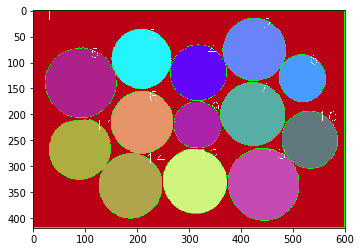

In [140]:
display_image(marker_show)

In [141]:
mask = np.zeros((rows, cols), np.uint8)

In [142]:
mask[markers != 1] = 255

In [143]:
nobg = cv.bitwise_and(img, img, mask=mask)

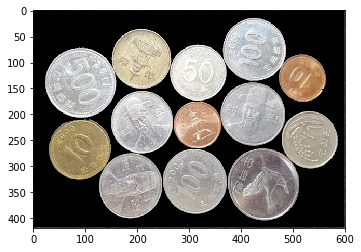

In [144]:
display_image(nobg)

In [145]:
coin_label = [l for l in np.unique(markers) if (l != 1 and l != -1)]

In [146]:
coin_label

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [148]:
coinImgs = []
for i, label in enumerate(coin_label):
    mask[:, :] = 0
    mask[markers == label] = 255
    coins = cv.bitwise_and(img, img, mask=mask)
    cntr, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    
    x, y, w, h = cv.boundingRect(cntr[0])
    coin = coins[y:y+h, x:x+w]
    coinImgs.append(coin)

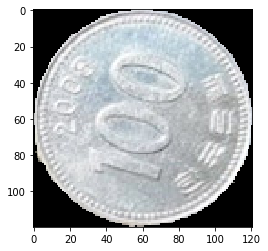

In [149]:
display_image(coinImgs[0])

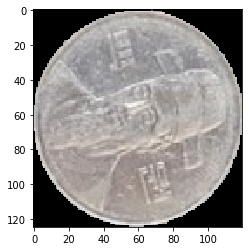

In [150]:
display_image(coinImgs[-1])